# Marginal Stability Vehicle Sizing
This sheet uses <code>numpy, matplotlib, and simulations</code>.

<code>simulations</code> is developed and maintained (no promises) by Cameron. The current version of the code is 0.0.1 and can be downloaded from github [here](https://github.com/cmflannery/simulations). The source-code is not currently on pip.

In [1]:
import simulations as sim
import matplotlib.pyplot as plt
import numpy as np
import math as math

In [2]:
def plot_alt(fig):
    # plot altitude
    ax1 = fig.add_subplot(3,1,1)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,kmaltitude)
    ax1.set_ylabel('Altitude (km)')

    ax1.set_title('Altitude and Velocity')

    # plot velocity
    kmVel = [x/1000 for x in velocity]
    ax2 = fig.add_subplot(3,1,2)
    ax2.xaxis.grid(linewidth=1.0)
    ax2.yaxis.grid(linewidth=1.0)
    ax2.grid(True, linewidth=1)
    ax2.plot(time,kmVel)
    ax2.set_ylabel('Velocity (km/s)')

    # plot acceleration
    gees = [x/g0 for x in acceleration]
    ax3 = fig.add_subplot(3,1,3)
    ax3.xaxis.grid(linewidth=1.0)
    ax3.yaxis.grid(linewidth=1.0)
    ax3.grid(True, linewidth=1)
    ax3.plot(time,gees)
    ax3.set_ylabel('Acceleration (gees)')
    ax3.set_xlabel('Time (s)')
    
def plot_thrust(fig):
    # plot thrust
    ax = fig.add_subplot(2,1,1)
    ax.xaxis.grid(linewidth=1.0)
    ax.yaxis.grid(linewidth=1.0)
    ax.grid(True, linewidth=1)
    ax.plot(time,thrust)
    ax.set_ylabel('Thrust (N)')
    
    ax.set_title('Thrust and Drag')
    
    # plot drag
    ax1 = fig.add_subplot(2,1,2)
    ax1.xaxis.grid(linewidth=1.0)
    ax1.yaxis.grid(linewidth=1.0)
    ax1.grid(True, linewidth=1)
    ax1.plot(time,drag)
    ax1.set_ylabel('Drag (N)')
    ax1.set_ylim(0,2e5)

In [10]:
burntime = 33# s

nengines = 1
thrust_sl = 22200  # N
Isp = 260
g0 = 9.81
mdot = nengines*thrust_sl/(g0*Isp)
twratio = 50  # estimated thrust 2 weight ratio

mstructure = 71  # kg
mavionics = 5  # kg
msystems = 30.75 #kg
mmisc = 11 #kg
mengine = thrust_sl/(twratio*g0)
mpropulsion = mengine + 4.5 # kg
mpropellant = mdot*burntime
mtank = mpropellant * .46
m0 = mpropulsion + mpropellant + mstructure + mavionics + msystems + mmisc + mtank
refArea = .0325
#reference area of .05 for 10" rocket, .0325 for 8" rocket

print('### STRUCTURAL PARAMETERS ###')
print('Propellant Mass = %.2f kg' % mpropellant)
print('Propulsion Mass = %.2f kg' % mpropulsion)
print('Structural Mass = %.2f kg' % (mstructure + mtank))
print('Mass Propellant Ratio (Mprop/M0) %.2f' % (mpropellant/m0))
print('Total Wet Mass: %.2f kg' % (m0))
print('Total Dry Mass: %.2f kg' % (m0-mpropellant))

print('\n### ENGINE PARAMETERS ###')
print('Thrust = %d N' % thrust_sl)
print('Isp = %d s' % Isp)
print('mdot = %.2f kg/s' % mdot)
print('Total Impulse = %i Ns' % (thrust_sl*burntime))

print('\n### OTHER IMPORTANT THINGS ###')
print('Burn Time = %.2f s' % burntime)

initialConditions = {
    'time': 0,
    'velocity': 0,
    'flight_angle': 0,
    'flight_heading': np.deg2rad(90),
    'latitude': 0,
    'longitude': 0,
    'altitude': 0,
    'mass': m0,
    'heat': 0,
    'lift_coefficient': 0,
    'bank_angle': 0,
    'reference_area': refArea
}

engines = {
    'thrust_sl': thrust_sl,
    'thrust_angle': 0,
    'Isp': Isp,
    'Ae': 0.25,
    'nengines': nengines
}

### STRUCTURAL PARAMETERS ###
Propellant Mass = 287.23 kg
Propulsion Mass = 49.76 kg
Structural Mass = 203.12 kg
Mass Propellant Ratio (Mprop/M0) 0.49
Total Wet Mass: 586.86 kg
Total Dry Mass: 299.63 kg

### ENGINE PARAMETERS ###
Thrust = 22200 N
Isp = 260 s
mdot = 8.70 kg/s
Total Impulse = 732600 Ns

### OTHER IMPORTANT THINGS ###
Burn Time = 33.00 s


In [11]:
itsatest = sim.Rocket(initialConditions, engines, burntime)
altitude, velocity, acceleration, mass, time, thrust, drag = itsatest.run()

Apogee = 104 km
Max Velocity = 1.31 km/s
Max Acceleration = 5.96 gees


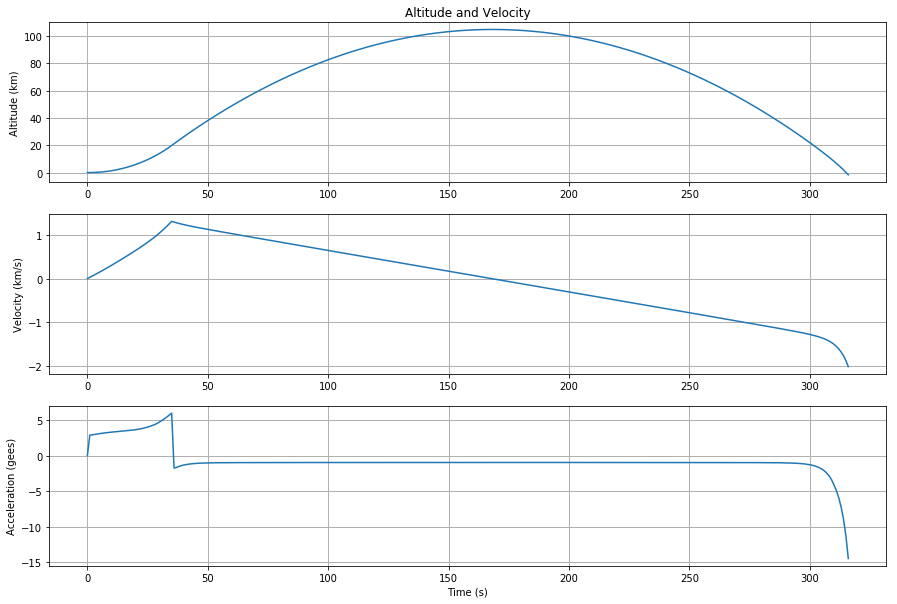

In [12]:
kmaltitude = [x/1000 for x in altitude]
print('Apogee = %d km' % max(kmaltitude))
kmvelocity = [v/1000 for v in velocity]
print('Max Velocity = %.2f km/s' % max(kmvelocity))
gees = [a/g0 for a in acceleration]
print('Max Acceleration = %.2f gees' % max(gees))

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.2)

# fig2 = plt.figure(figsize=(15,10))
# fig2.subplots_adjust(hspace=0.2)

plot_alt(fig)
plt.show()

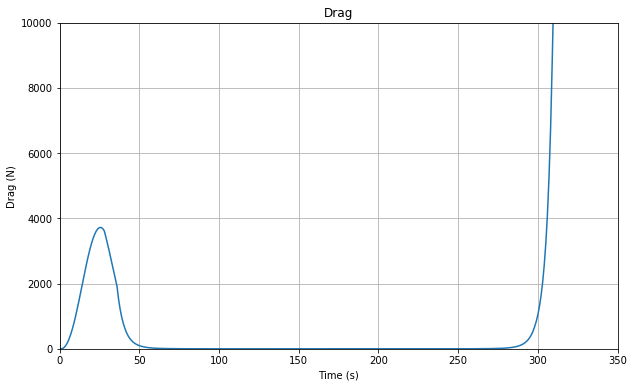

In [13]:
fig1 = plt.figure(figsize=(10,6))
ax11 = fig1.add_subplot(1,1,1)
ax11.plot(time,drag)
ax11.set_title('Drag')
ax11.set_xlabel('Time (s)')
ax11.set_ylabel('Drag (N)')
ax11.grid()
plt.axis([0,350,0,10000])
plt.show()